In [57]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input,Conv2D,Activation,MaxPool2D,Dense,Dropout,GlobalAveragePooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import plot_model

In [58]:
data_path = "C:/Users/joelj/Downloads/AI VAR Backend/Dataset"
output_path = "C:/Users/joelj/Downloads/AI VAR Backend/"
input_shape = (256,256)

In [59]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2,brightness_range=[1.2,2],
                           horizontal_flip=True,vertical_flip=True,rotation_range=90)
train_data=datagen.flow_from_directory(data_path,batch_size=32,class_mode='binary',subset='training',target_size=input_shape)
val_data=datagen.flow_from_directory(data_path,batch_size=32,class_mode='binary',subset='validation',target_size=input_shape)

Found 964 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [60]:
print(train_data.class_indices)
print(val_data.class_indices)

{'Clean_Tackles': 0, 'Fouls': 1}
{'Clean_Tackles': 0, 'Fouls': 1}


In [61]:
# base_model = EfficientNetB4(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [62]:
# base_model.trainable = False

# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1,activation='sigmoid'))

In [63]:
# Creating model from scratch:
inputs=Input(shape=(256,256,3))
#Initial Layers of 256 Filters 
x = Conv2D(64,5,padding='same')(inputs)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(inputs)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)

 #Decreasing Filters and MAxPool Layers
x = Conv2D(32,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
# x = BatchNormalization()(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(16,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
# x = BatchNormalization()(x)
x = Conv2D(16,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)

 #Dense Layers
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(400)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(400)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(1)(x)

#Output
out = Activation(activation='sigmoid')(x)

# final model:
model = Model(inputs,out,name='BaseModel')

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [64]:
model.load_weights('C:/Users/joelj/Downloads/AI VAR Backend/weights.h5')

In [65]:
# training model:
es=EarlyStopping(monitor='val_accuracy',patience=7,verbose=0,restore_best_weights=True)
logs=model.fit(train_data,validation_data=val_data,epochs=100,callbacks=[checkpoint])

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5462 - loss: 0.9030
Epoch 1: val_accuracy did not improve from 0.77083
31/31 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5452 - loss: 0.8988 - val_accuracy: 0.5083 - val_loss: 0.6935
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5049 - loss: 0.6967
Epoch 2: val_accuracy did not improve from 0.77083
31/31 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5049 - loss: 0.6966 - val_accuracy: 0.5542 - val_loss: 0.6930
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4903 - loss: 0.6935
Epoch 3: val_accuracy did not improve from 0.77083
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4907 - loss: 0.6935 - val_accuracy: 0.5083 - val_loss: 0.6927
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5111 - loss: 0.6925
Epoch 4: val_accuracy did not improve from 0.77083
31/31 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5113 - loss: 0.6925 - val_accuracy: 0.5083 - val_loss: 0.6926


In [66]:
clear_session()

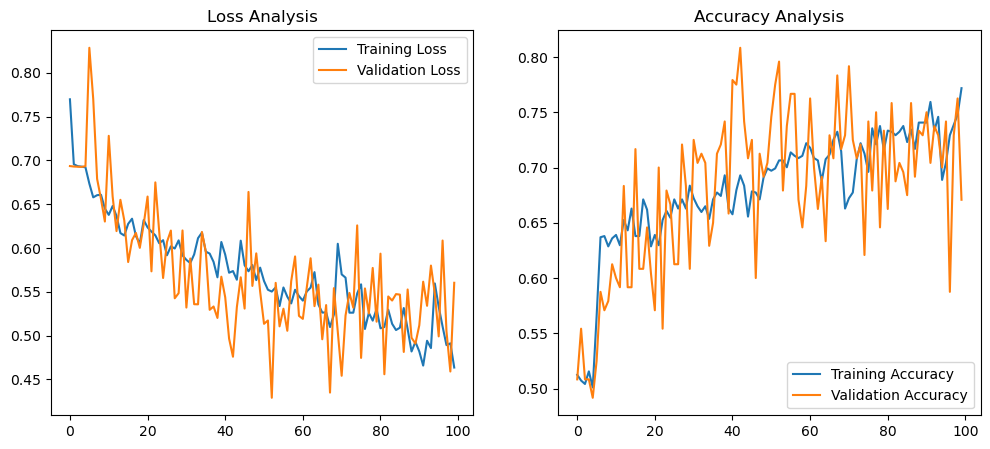

In [67]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['val_loss'], label='Validation Loss')
plt.title('Loss Analysis')
plt.legend()
plt.subplot(1,2,2)
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Analysis')
plt.legend()
plt.show()

In [73]:
model.evaluate(val_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 960ms/step - accuracy: 0.6085 - loss: 0.6028


[0.5961772799491882, 0.6333333253860474]

In [74]:
model.save('C:/Users/joelj/Downloads/AI VAR Backend/best_model1.h5')

## Final validation accuracy: ~80%